# Load data

In [ ]:
# Import necessary libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Load the dataset from Hugging Face 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Clean up the 'job_posted_date' column by converting it to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Analysis - Trending skills

In [ ]:
# Goal: 
#   For Data Analyst role, create pivot table of months as rows, top 5 job_skills as columns, 
#   and counts of job postings as values

# Step 1: Filter the DataFrame for Data Analyst roles
data_analyst_df = df[df['job_title_short'] == 'Data Analyst'].copy()
data_analyst_df

In [ ]:
# Step 2: Extract month and year from 'job_posted_date'
data_analyst_df['job_posted_month'] = data_analyst_df['job_posted_date'].dt.month
data_analyst_df['job_posted_month'].head()

In [ ]:
# Step 3: Explode the 'job_skills' column to create a new row for each skill
data_analyst_df_exploded = data_analyst_df.explode('job_skills')
data_analyst_df_exploded

In [24]:
# Step 4: Identify the top 5 most occurring skills
top_5_skills = data_analyst_df_exploded['job_skills'].value_counts().head(5).index.tolist()
top_5_skills

['sql', 'excel', 'python', 'tableau', 'power bi']

In [38]:

# Step 5: Filter the DataFrame for only the top 5 skills
filtered_df = data_analyst_df_exploded[data_analyst_df_exploded['job_skills'].isin(top_5_skills)]
filtered_df['job_skills'].value_counts()



job_skills
sql         92428
excel       66860
python      57190
tableau     46455
power bi    39380
Name: count, dtype: int64

In [58]:
# Step 6: Create a pivot table with months as rows, top 5 skills as columns, and counts of job postings as values

#Create a pivot table
pivot_table = filtered_df.pivot_table(
    index='job_posted_month',  # Rows
    columns='job_skills',     # Columns
    values='job_title_short', # Values
    aggfunc='count'           # Aggregation function
).fillna(0)

# Sum the total count for each skills as a new row
pivot_table.loc['Total'] = pivot_table.sum()

# Sort the order of the columns by the total count of the skills
sorted_col = pivot_table.loc['Total'].sort_values(ascending=False).index.tolist()
pivot_table = pivot_table[sorted_col]
pivot_table = pivot_table.drop('Total')
pivot_table



job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
1,11336,8170,6606,5596,4285
2,7947,5772,4751,3936,3307
3,7868,5675,4741,4051,3176
4,7553,5496,4557,3776,3106
5,6617,4773,4070,3245,2695
6,7584,5724,4707,3812,3275
7,7687,5513,4831,3928,3350
8,8823,6482,5576,4533,3859
9,6829,4886,4229,3446,3118


<Figure size 1200x600 with 0 Axes>

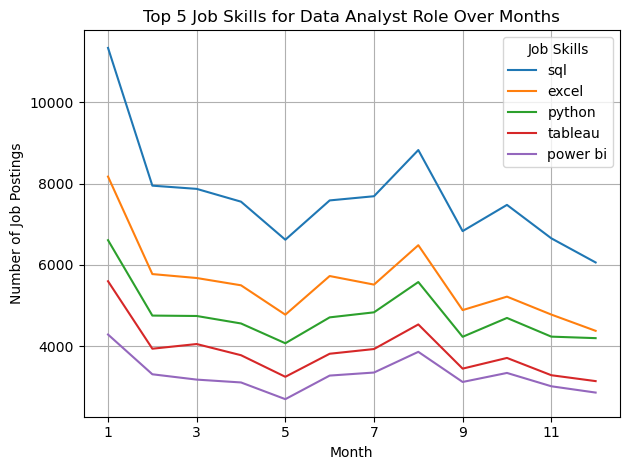

In [59]:
# Step 7: Plot the pivot table as a line chart
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='line')
plt.title('Top 5 Job Skills for Data Analyst Role Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=0)
plt.legend(title='Job Skills')
plt.grid()
plt.tight_layout()
plt.show()